In [715]:
orders = pd.read_csv('Orders - MetaData.csv')

Reference Lists:

In [719]:
category = np.unique(orders['Category'])
zipcode = np.unique(orders['ZIP_3d'])
state = np.unique(orders['State'])

In [456]:
product = np.unique(orders['Product'])

In [171]:
day = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
week = list(range(1,53))

In [367]:
dayindex = ['Monday','Tuesday','Wednesday', 'Thursday','Friday','Saturday','Sunday']

Dictionaries

In [85]:
state_abbreviation_df = pd.read_csv("State Abbreviations.csv")
state_abbreviation_dict = state_abbreviation_df.set_index('State')['Code'].to_dict()

In [124]:
zip_latlong_df = pd.read_csv("Zip Code - Address Data.csv")
zip_lat_dict = zip_latlong_df.set_index('ZIP3')['Lat'].to_dict()
zip_long_dict = zip_latlong_df.set_index('ZIP3')['Lon'].to_dict()

# Background

In [672]:
print("Total Number of Orders: "+str(orders['Quantity'].count()))

Total Number of Orders: 713573


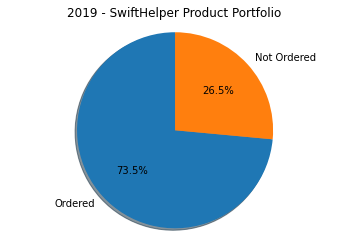

In [686]:
labels = 'Ordered', 'Not Ordered'
pie = [586, 211]
fig1, ax1 = plt.subplots()
ax1.pie(pie, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.title("2019 - SwiftHelper Product Portfolio")
plt.show()

In [687]:
min_orders = orders.loc[orders['Quantity']<=500]

print("# Orders Less than 500: "+ str(min_orders['Quantity'].count()))
print("# Orders Less than 100: "+ str(orders.loc[orders['Quantity']<=100]['Quantity'].count()))

# Orders Less than 500: 713104
# Orders Less than 100: 639178


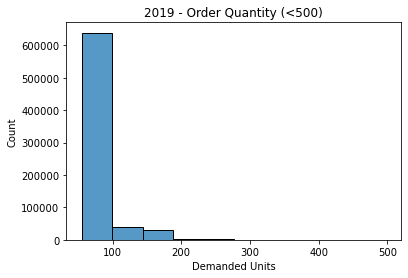

In [695]:
sns.histplot(data = min_orders['Quantity'],bins=10)
plt.xlabel('Demanded Units')
plt.ylabel('Count')
plt.title('2019 - Order Quantity (<500)')
plt.show()

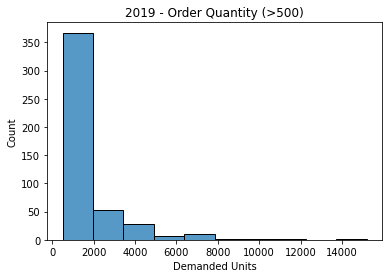

In [697]:
max_orders = orders.loc[orders['Quantity']>=500]
sns.histplot(data = max_orders['Quantity'],bins=10)
plt.xlabel('Demanded Units')
plt.ylabel('Count')
plt.title('2019 - Order Quantity (>500)')
plt.show()

# 1a. Demand Share

Category - State

In [753]:
cat_df = orders.groupby(['Category']).sum().reset_index()
cat_df = cat_df[['Category','Quantity']]
cat_df['Percent Share'] = cat_df['Quantity']/cat_df['Quantity'].sum()*100
cat_df = cat_df.sort_values(by='Percent Share',ascending=False).reset_index()
cat_df.head(10)

,index,Category,Quantity,Percent Share
0,7,H,9307335,16.566423
1,3,D,8817476,15.694508
2,11,L,8559549,15.235415
3,17,R,7061525,12.569034
4,20,U,5833880,10.383910
5,16,Q,4262260,7.586533
6,0,A,3296886,5.868233
7,18,S,3215702,5.723731
8,10,K,1159606,2.064020
9,24,Y,1121205,1.995669


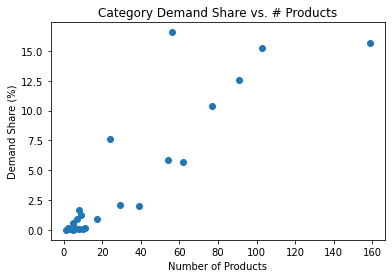

In [754]:
x = [56,159,103,91,77,24,54,62,29,39,8,9,7,17,5,2,6,11,4,6,8,3,10,5,1]
y = cat_df['Percent Share']
plt.scatter(x,y)
plt.xlabel('Number of Products')
plt.ylabel('Demand Share (%)')
plt.title('Category Demand Share vs. # Products')
plt.show()

In [114]:
cat_state_df = orders.groupby(['Category','State']).sum()
cat_state_df = cat_state_df['Quantity']
cat_state_df = cat_state_df.unstack(['State']).fillna(0)

In [115]:
total_qty = cat_state_df.sum().sum()
category_qty_df = cat_state_df.sum(axis=1)
category_qty_df['Percent Share'] = category_qty_df/total_qty

cat_state_share_df = cat_state_df/total_qty

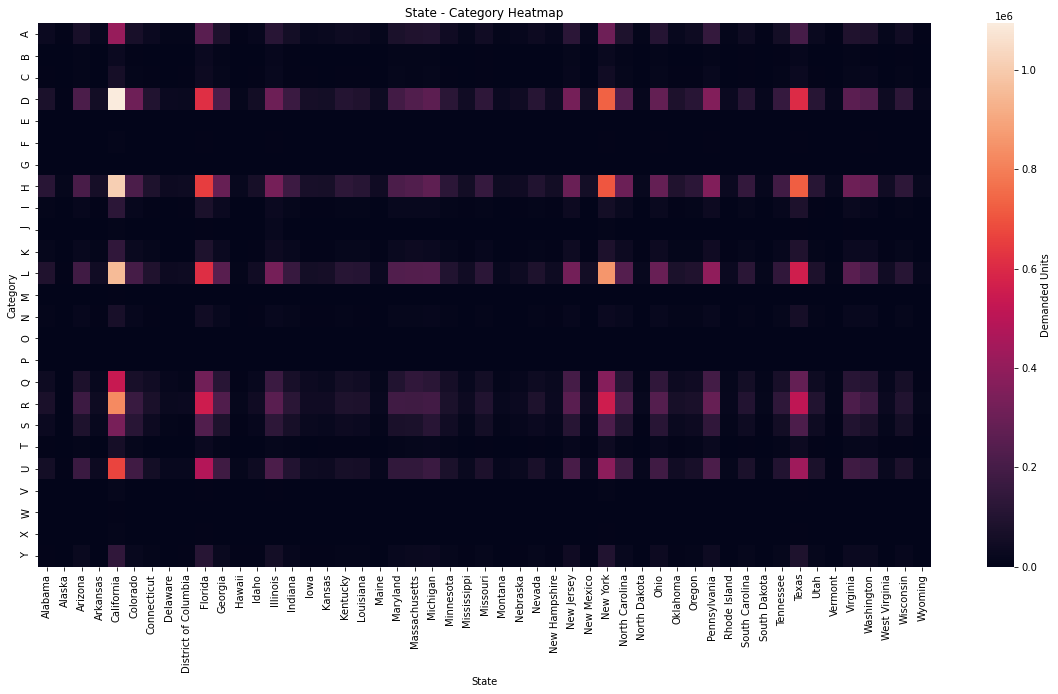

In [186]:
plt.figure(figsize=(20,10))
sns.heatmap(cat_state_df,cbar_kws={'label':'Demanded Units'})
plt.title('State - Category Heatmap')
plt.show()

Category - Zip Code

In [117]:
cat_zipcode_df = orders.groupby(['Category','ZIP_3d']).sum()
cat_zipcode_df = cat_zipcode_df['Quantity']
cat_zipcode_df = cat_zipcode_df.unstack(['ZIP_3d']).fillna(0)

In [930]:
cat_zip_share_df = cat_zipcode_df/total_qty

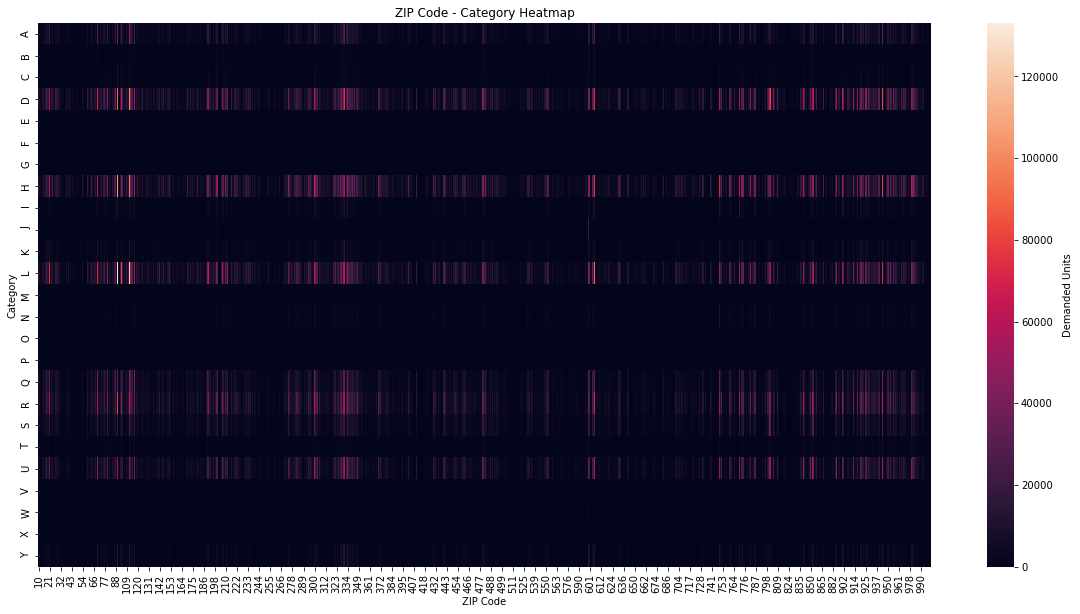

In [185]:
plt.figure(figsize=(20,10))
sns.heatmap(cat_zipcode_df, cbar_kws={'label':'Demanded Units'})
plt.title('ZIP Code - Category Heatmap')
plt.xlabel('ZIP Code')
plt.show()

Global - State

In [924]:
state_qty_df = cat_state_df.sum()
#state_qty_df['Percent Share'] = state_qty_df/total_qty

In [925]:
state_qty_df = state_qty_df.reset_index()
state_qty_df.columns = ['State','Quantity']
state_qty_df.loc[:,'Abbreviation'] = state_qty_df.loc[:,'State']
state_qty_df.replace({"Abbreviation":state_abbreviation_dict},inplace=True)

In [121]:
fig = px.choropleth(state_qty_df, locations="Abbreviation", color="Quantity", locationmode = 'USA-states') 
fig.update_layout(title_text = 'Demand by State', geo_scope='usa')
fig.show() 

In [926]:
state_qty_df = state_qty_df.sort_values(by='Quantity',ascending=False).reset_index()
state_qty_df['Percent Share'] = state_qty_df['Quantity']/state_qty_df['Quantity'].sum()*100
#state_qty_df

Global - by Zip Code

In [160]:
zipcode_qty_df = cat_zipcode_df.sum()
zipcode_qty_df['Percent Share'] = zipcode_qty_df/total_qty

In [161]:
zipcode_qty_df = zipcode_qty_df.reset_index()
zipcode_qty_df.columns = ['ZIP','Quantity']

zipcode_qty_df.loc[:,'Latitude'] = zipcode_qty_df.loc[:,'ZIP']
zipcode_qty_df.loc[:,'Longitude'] = zipcode_qty_df.loc[:,'ZIP']

zipcode_qty_df.replace({"Latitude":zip_lat_dict,"Longitude":zip_long_dict},inplace=True)

In [706]:
zipcode_qty_df = zipcode_qty_df.sort_values(by=['Quantity'],ascending=False)
fig = go.Figure(data=go.Scattergeo(
        lon = zipcode_qty_df['Longitude'],
        lat = zipcode_qty_df['Latitude'],
        marker ={'color': zipcode_qty_df['Quantity'],'colorbar':{'title':'Demanded Units'},'size':zipcode_qty_df['Quantity']/10000,}))
fig.update_layout(title = 'Demand by ZIP Code',geo_scope='usa',)
fig.show()

In [709]:
zipcode_qty_df['Percent Share'] = zipcode_qty_df['Quantity']/zipcode_qty_df['Quantity'].sum()*100
zipcode_qty_df.head(10)

,ZIP,Quantity,Latitude,Longitude,Percent Share
79,100,618083.0,40.745256,-73.985202,1.100146
91,112,575267.0,40.666492,-73.953938,1.023936
555,606,513014.0,41.881020,-87.664762,0.913130
842,945,505731.0,37.845875,-122.059678,0.900167
305,331,464854.0,25.787712,-80.241397,0.827409
275,300,427521.0,33.878827,-84.247223,0.760958
59,70,427005.0,40.667400,-74.114600,0.760040
679,750,402989.0,32.897812,-96.877614,0.717293
11,21,380758.0,42.351704,-71.077176,0.677723
96,117,379145.0,40.788074,-73.306259,0.674852


In [934]:
writer = pd.ExcelWriter("1a Demand Share.xlsx") 
cat_df.to_excel(writer, sheet_name = 'Category')
state_qty_df.to_excel(writer, sheet_name = 'State')
zipcode_qty_df.to_excel(writer, sheet_name = 'ZIP Code')
cat_state_share_df.to_excel(writer, sheet_name = 'Category - State')
cat_zip_share_df.to_excel(writer, sheet_name = 'Category - ZIP Code')
writer.save()

# 1.b Demand Distribution

Overall by Week

In [237]:
global_week_df = orders.groupby(['Week of Year']).sum()
global_week_df = global_week_df['Quantity']
global_week_df = global_week_df.reset_index()
global_week_df.columns = ['Week of Year','Quantity']

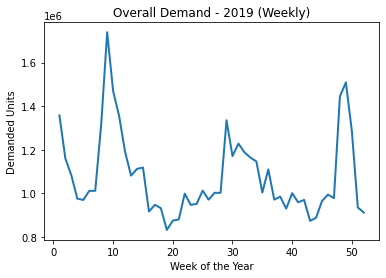

In [455]:
plt.plot(global_week_df['Week of Year'],global_week_df['Quantity'],linewidth=2)
plt.xlabel('Week of the Year')
plt.ylabel('Demanded Units')
plt.title('Overall Demand - 2019 (Weekly)')
plt.show()

In [760]:
global_week_df['Percent Share'] = global_week_df['Quantity']/global_week_df['Quantity'].sum()*100
global_week_df = global_week_df.sort_values(by='Percent Share',ascending=False)
global_week_df.head(5)

,Week of Year,Quantity,Percent Share
8,9,1739311,3.095855
48,49,1509442,2.686704
9,10,1469480,2.615574
47,48,1444763,2.571580
0,1,1357794,2.416781


Week - State

In [939]:
state_week_df = orders.groupby(['State','Week of Year']).sum()
state_week_df = state_week_df['Quantity']
state_week_df = state_week_df.unstack(['State']).fillna(0)

In [942]:
state_week_share_df=state_week_df/total_qty

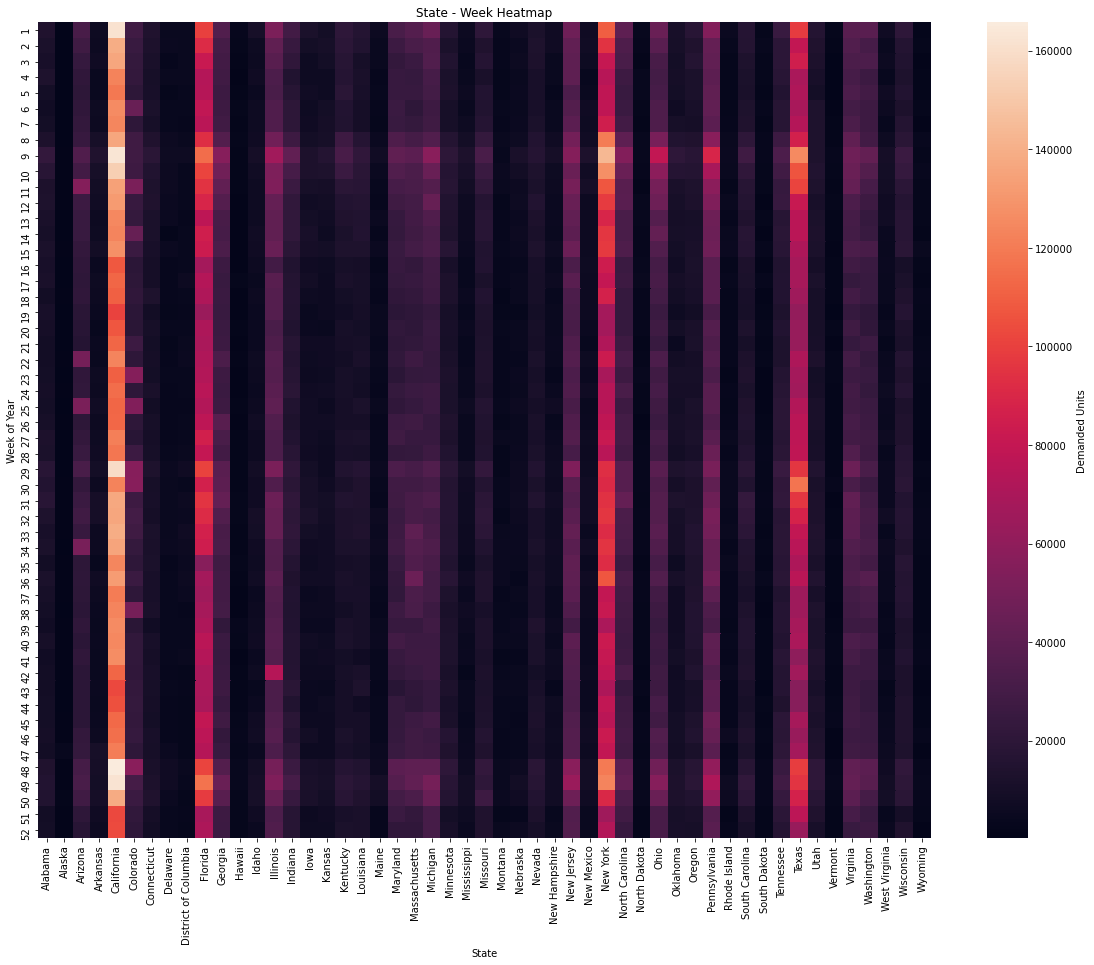

In [240]:
plt.figure(figsize=(20,15))
sns.heatmap(state_week_df,cbar_kws={'label':'Demanded Units'})
plt.title('State - Week Heatmap')
plt.show()

In [246]:
average_df = pd.DataFrame(np.rint(state_week_df.mean(axis=1))).reset_index()
average_df.columns = ['Week of Year','Average']

In [247]:
state_week_df = orders.groupby(['State','Week of Year']).sum()
state_week_df = state_week_df['Quantity']
state_week_df = state_week_df.reset_index()

In [265]:
Illinois = state_week_df[state_week_df['State'].str.contains('Illinois')]
Colorado = state_week_df[state_week_df['State'].str.contains('Colorado')]
Arizona = state_week_df[state_week_df['State'].str.contains('Arizona')]
Massachusetts = state_week_df[state_week_df['State'].str.contains('Massachusetts')]

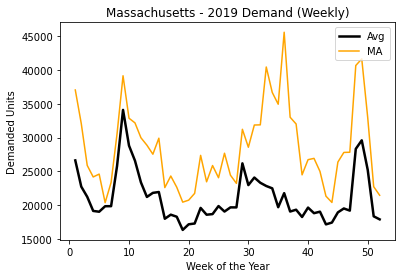

In [401]:
plt.plot(average_df['Week of Year'],average_df['Average'],label="Avg",color='black',linewidth=2.5)
plt.plot(Massachusetts['Week of Year'],Massachusetts['Quantity'],label='MA',color="orange")
plt.xlabel("Week of the Year")
plt.ylabel("Demanded Units")
plt.title("Massachusetts - 2019 Demand (Weekly)")
plt.legend(loc='upper right')
plt.show()

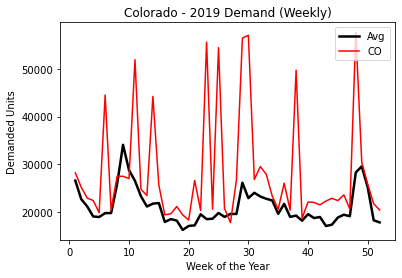

In [402]:
plt.plot(average_df['Week of Year'],average_df['Average'],label="Avg",color='black',linewidth=2.5)
plt.plot(Colorado['Week of Year'],Colorado['Quantity'],label='CO', color="red")
plt.xlabel("Week of the Year")
plt.ylabel("Demanded Units")
plt.title("Colorado - 2019 Demand (Weekly)")
plt.legend(loc='upper right')
plt.show()

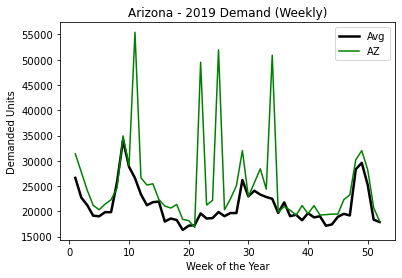

In [403]:
plt.plot(average_df['Week of Year'],average_df['Average'],label="Avg",color='black',linewidth=2.5)
plt.plot(Arizona['Week of Year'],Arizona['Quantity'],label='AZ',color="green")
plt.xlabel("Week of the Year")
plt.ylabel("Demanded Units")
plt.title("Arizona - 2019 Demand (Weekly)")
plt.legend(loc='upper right')
plt.show()

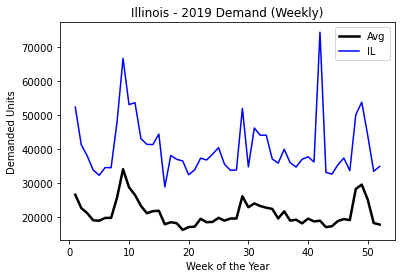

In [404]:
plt.plot(average_df['Week of Year'],average_df['Average'],label="Avg",color='black',linewidth=2.5)
plt.plot(Illinois['Week of Year'],Illinois['Quantity'],label='IL',color="blue")
plt.xlabel("Week of the Year")
plt.ylabel("Demanded Units")
plt.title("Illinois - 2019 Demand (Weekly)")
plt.legend(loc='upper right')
plt.show()

Week - Zip Code

In [943]:
zipcode_week_df = orders.groupby(['ZIP_3d','Week of Year']).sum()
zipcode_week_df = zipcode_week_df['Quantity']
zipcode_week_df = zipcode_week_df.unstack(['ZIP_3d']).fillna(0)

In [946]:
zipcode_week_share_df=zipcode_week_df/total_qty

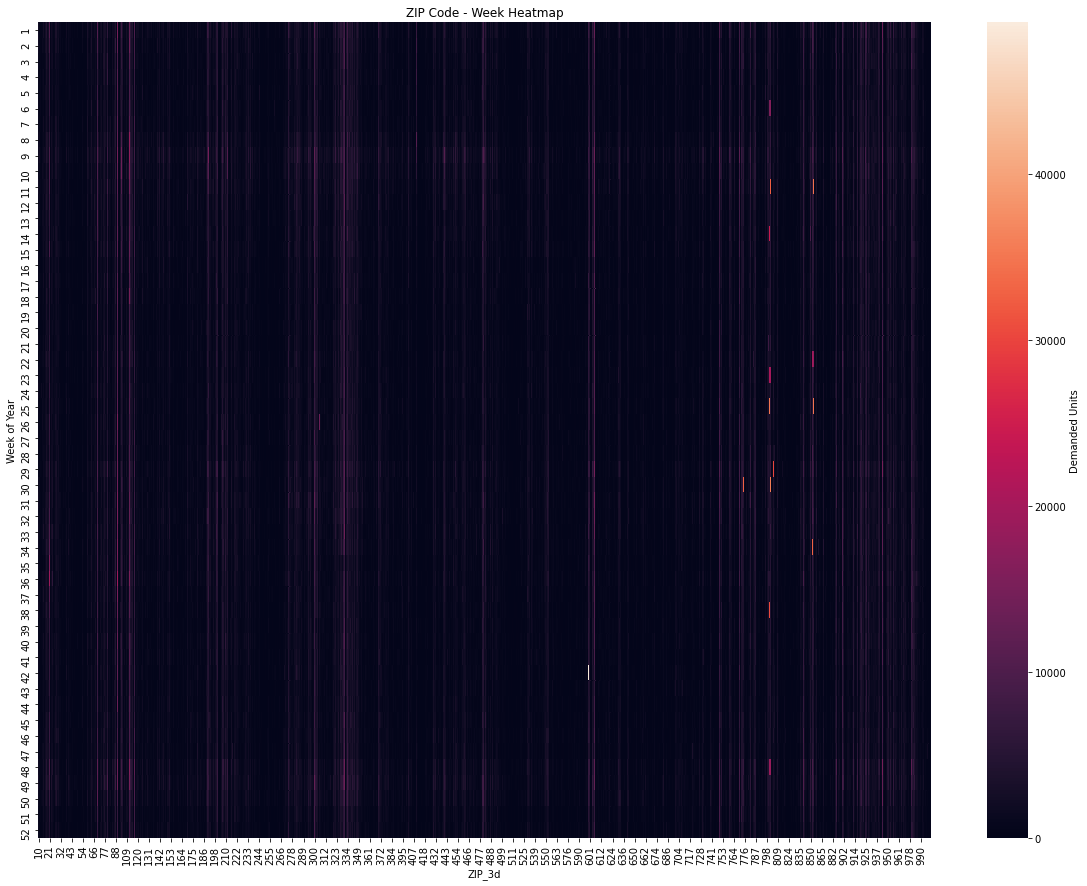

In [323]:
plt.figure(figsize=(20,15))
sns.heatmap(zipcode_week_df,cbar_kws={'label':'Demanded Units'})
plt.title('ZIP Code - Week Heatmap')
plt.show()

In [324]:
average_zip_df = pd.DataFrame(np.rint(zipcode_week_df.mean(axis=1))).reset_index()
average_zip_df.columns = ['Week of Year','Average']

In [325]:
zipcode_week_df = orders.groupby(['ZIP_3d','Week of Year']).sum()
zipcode_week_df = zipcode_week_df['Quantity']
zipcode_week_df = zipcode_week_df.reset_index()

In [783]:
z_600 = zipcode_week_df[zipcode_week_df['ZIP_3d'].astype('str').str.contains('600')]
z_021 = zipcode_week_df[zipcode_week_df['ZIP_3d'].astype('str').str.fullmatch('21')]
z_801 = zipcode_week_df[zipcode_week_df['ZIP_3d'].astype('str').str.contains('801')]
z_802 = zipcode_week_df[zipcode_week_df['ZIP_3d'].astype('str').str.contains('802')]
z_852 = zipcode_week_df[zipcode_week_df['ZIP_3d'].astype('str').str.contains('852')]
z_853 = zipcode_week_df[zipcode_week_df['ZIP_3d'].astype('str').str.contains('853')]

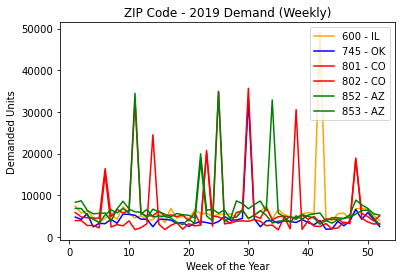

In [767]:
plt.plot(z_600['Week of Year'],z_600['Quantity'],label='600 - IL',color="orange")
plt.plot(z_021['Week of Year'],z_775['Quantity'],label='021 - MA',color="blue")
plt.plot(z_801['Week of Year'],z_801['Quantity'],label='801 - CO',color="red")
plt.plot(z_802['Week of Year'],z_802['Quantity'],label='802 - CO',color="red")
plt.plot(z_852['Week of Year'],z_852['Quantity'],label='852 - AZ',color="green")
plt.plot(z_853['Week of Year'],z_853['Quantity'],label='853 - AZ',color="green")
plt.xlabel("Week of the Year")
plt.ylabel("Demanded Units")
plt.title("ZIP Code - 2019 Demand (Weekly)")
plt.legend(loc='upper right')
plt.show()

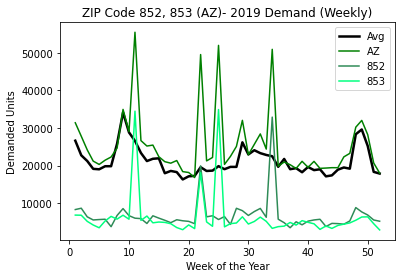

In [794]:
plt.plot(average_df['Week of Year'],average_df['Average'],label="Avg",color='black',linewidth=2.5)
plt.plot(Arizona['Week of Year'],Arizona['Quantity'],label='AZ',color="green")
plt.plot(z_852['Week of Year'],z_852['Quantity'],label='852',color="seagreen")
plt.plot(z_853['Week of Year'],z_853['Quantity'],label='853',color="springgreen")
plt.legend(loc='upper right')
plt.xlabel("Week of the Year")
plt.ylabel("Demanded Units")
plt.title("ZIP Code 852, 853 (AZ)- 2019 Demand (Weekly)")
plt.show()

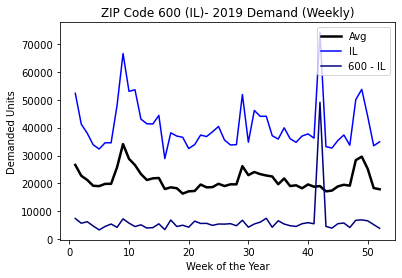

In [793]:
plt.plot(average_df['Week of Year'],average_df['Average'],label="Avg",color='black',linewidth=2.5)
plt.plot(Illinois['Week of Year'],Illinois['Quantity'],label='IL',color="blue")
plt.plot(z_600['Week of Year'],z_600['Quantity'],label='600',color="navy")
plt.legend(loc='upper right')
plt.xlabel("Week of the Year")
plt.ylabel("Demanded Units")
plt.title("ZIP Code 600 (IL)- 2019 Demand (Weekly)")
plt.show()

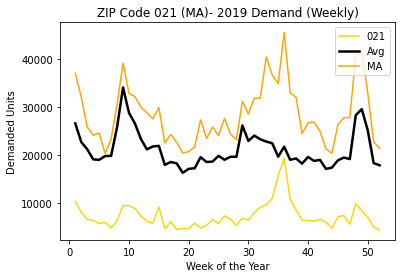

In [797]:
plt.plot(z_021['Week of Year'],z_021['Quantity'],label='021',color="gold")
plt.plot(average_df['Week of Year'],average_df['Average'],label="Avg",color='black',linewidth=2.5)
plt.plot(Massachusetts['Week of Year'],Massachusetts['Quantity'],label='MA',color="orange")
plt.legend(loc='upper right')
plt.xlabel("Week of the Year")
plt.ylabel("Demanded Units")
plt.title("ZIP Code 021 (MA)- 2019 Demand (Weekly)")
plt.show()

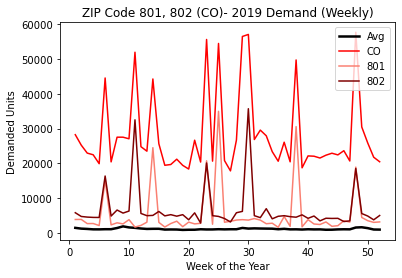

In [796]:
plt.plot(average_zip_df['Week of Year'],average_zip_df['Average'],label="Avg",color='black',linewidth=2.5)
plt.plot(Colorado['Week of Year'],Colorado['Quantity'],label='CO', color="red")
plt.plot(z_801['Week of Year'],z_801['Quantity'],label='801',color="salmon")
plt.plot(z_802['Week of Year'],z_802['Quantity'],label='802',color="maroon")
plt.legend(loc='upper right')
plt.xlabel("Week of the Year")
plt.ylabel("Demanded Units")
plt.title("ZIP Code 801, 802 (CO)- 2019 Demand (Weekly)")
plt.show()

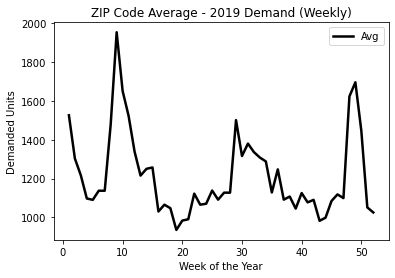

In [454]:
plt.plot(average_zip_df['Week of Year'],average_zip_df['Average'],label="Avg",color='black',linewidth=2.5)
plt.xlabel("Week of the Year")
plt.ylabel("Demanded Units")
plt.title("ZIP Code Average - 2019 Demand (Weekly)")
plt.legend(loc='upper right')
plt.show()

Overall by Day

In [376]:
global_day_df = orders.groupby(['Day of Week']).sum().reindex(dayindex)
global_day_df = global_day_df['Quantity']
global_day_df = global_day_df.reset_index()
global_day_df.columns = ['Day of Week','Quantity']

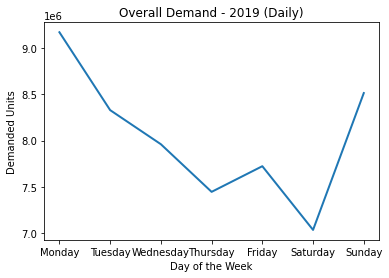

In [808]:
plt.plot(global_day_df['Day of Week'],global_day_df['Quantity'],linewidth=2)
plt.xlabel('Day of the Week')
plt.ylabel('Demanded Units')
plt.title('Overall Demand - 2019 (Daily)')
plt.show()

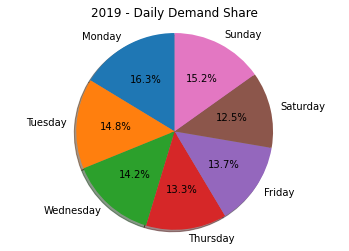

In [809]:
global_day_df['Percent Share'] = global_day_df['Quantity']/global_day_df['Quantity'].sum()*100
global_day_df
fig1, ax1 = plt.subplots()
ax1.pie(global_day_df['Percent Share'], labels=global_day_df['Day of Week'], autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.title("2019 - Daily Demand Share")
plt.show()

Day - State

In [949]:
state_day_df = orders.groupby(['State','Day of Week']).sum()
state_day_df = state_day_df['Quantity']
state_day_df = state_day_df.reindex(dayindex, level=1)
state_day_df = state_day_df.unstack(['State']).fillna(0)

In [951]:
state_day_share_df = state_day_df/total_qty

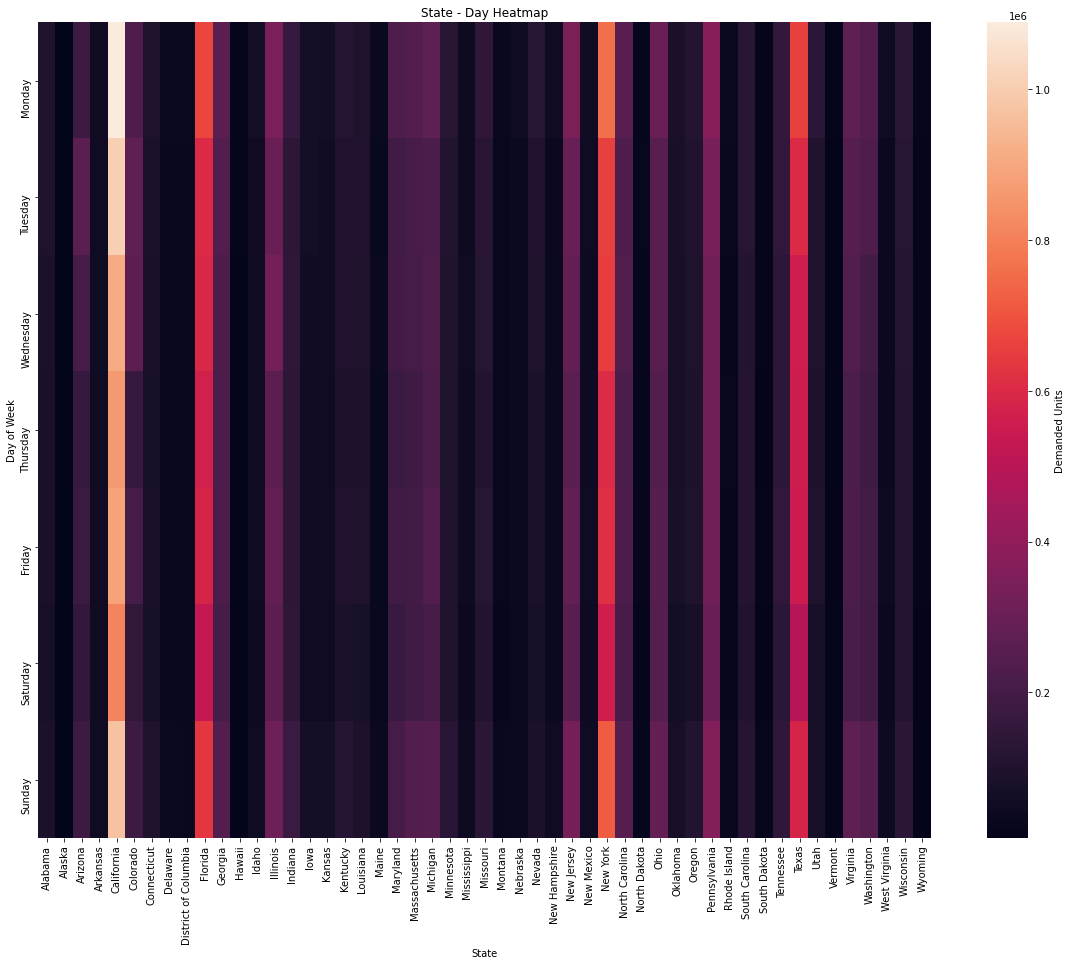

In [392]:
plt.figure(figsize=(20,15))
sns.heatmap(state_day_df,cbar_kws={'label':'Demanded Units'})
plt.title('State - Day Heatmap')
plt.show()

In [394]:
day_st_average_df = pd.DataFrame(np.rint(state_day_df.mean(axis=1))).reset_index()
day_st_average_df.columns = ['Day of Week','Average']

In [420]:
state_day_df = orders.groupby(['State','Day of Week']).sum()
state_day_df = state_day_df['Quantity']
state_day_df = state_day_df.reindex(dayindex, level=1)
state_day_df = state_day_df.reset_index()

In [813]:
Illinois_day = state_day_df[state_day_df['State'].str.contains('Illinois')]
Arizona_day = state_day_df[state_day_df['State'].str.contains('Arizona')]
Maryland_day = state_day_df[state_day_df['State'].str.contains('Maryland')]
Coloado_day = state_day_df[state_day_df['State'].str.contains('Colorado')]


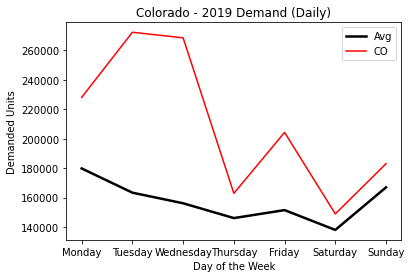

In [814]:
plt.plot(day_st_average_df['Day of Week'],day_st_average_df['Average'],label="Avg",color='black',linewidth=2.5)
plt.plot(Coloado_day['Day of Week'],Coloado_day['Quantity'],label='CO',color="red")
plt.legend(loc='upper right')
plt.title('Colorado - 2019 Demand (Daily)')
plt.xlabel('Day of the Week')
plt.ylabel('Demanded Units')
plt.show()

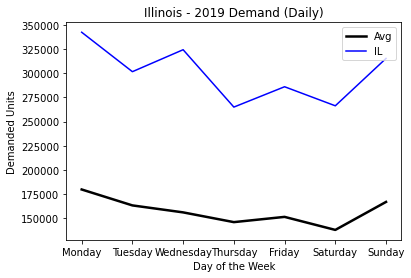

In [810]:
plt.plot(day_st_average_df['Day of Week'],day_st_average_df['Average'],label="Avg",color='black',linewidth=2.5)
plt.plot(Illinois_day['Day of Week'],Illinois_day['Quantity'],label='IL',color="blue")
plt.legend(loc='upper right')
plt.title('Illinois - 2019 Demand (Daily)')
plt.xlabel('Day of the Week')
plt.ylabel('Demanded Units')
plt.show()

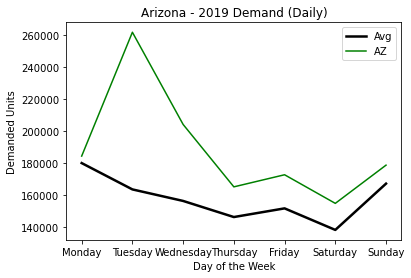

In [431]:
plt.plot(day_st_average_df['Day of Week'],day_st_average_df['Average'],label="Avg",color='black',linewidth=2.5)
plt.plot(Arizona_day['Day of Week'],Arizona_day['Quantity'],label='AZ',color="green")
plt.legend(loc='upper right')
plt.title('Arizona - 2019 Demand (Daily)')
plt.xlabel('Day of the Week')
plt.ylabel('Demanded Units')
plt.show()

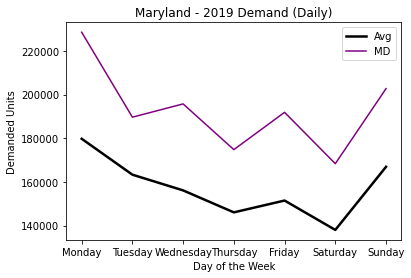

In [815]:
plt.plot(day_st_average_df['Day of Week'],day_st_average_df['Average'],label="Avg",color='black',linewidth=2.5)
plt.plot(Maryland_day['Day of Week'],Maryland_day['Quantity'],label='MD',color="purple")
plt.legend(loc='upper right')
plt.title('Maryland - 2019 Demand (Daily)')
plt.xlabel('Day of the Week')
plt.ylabel('Demanded Units')
plt.show()

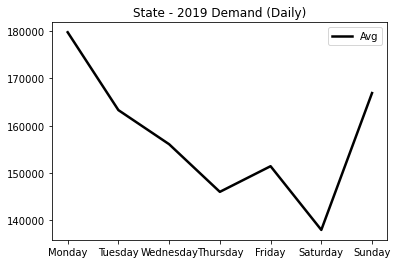

In [424]:
plt.plot(day_st_average_df['Day of Week'],day_st_average_df['Average'],label="Avg",color='black',linewidth=2.5)
plt.legend()
plt.title('State - 2019 Demand (Daily)')
plt.show()

Day - ZIP Code

In [953]:
zipcode_day_df = orders.groupby(['ZIP_3d','Day of Week']).sum()
zipcode_day_df = zipcode_day_df['Quantity']
zipcode_day_df = zipcode_day_df.reindex(dayindex, level=1)
zipcode_day_df = zipcode_day_df.unstack(['ZIP_3d']).fillna(0)

In [955]:
zipcode_day_share_df = zipcode_day_df/total_qty

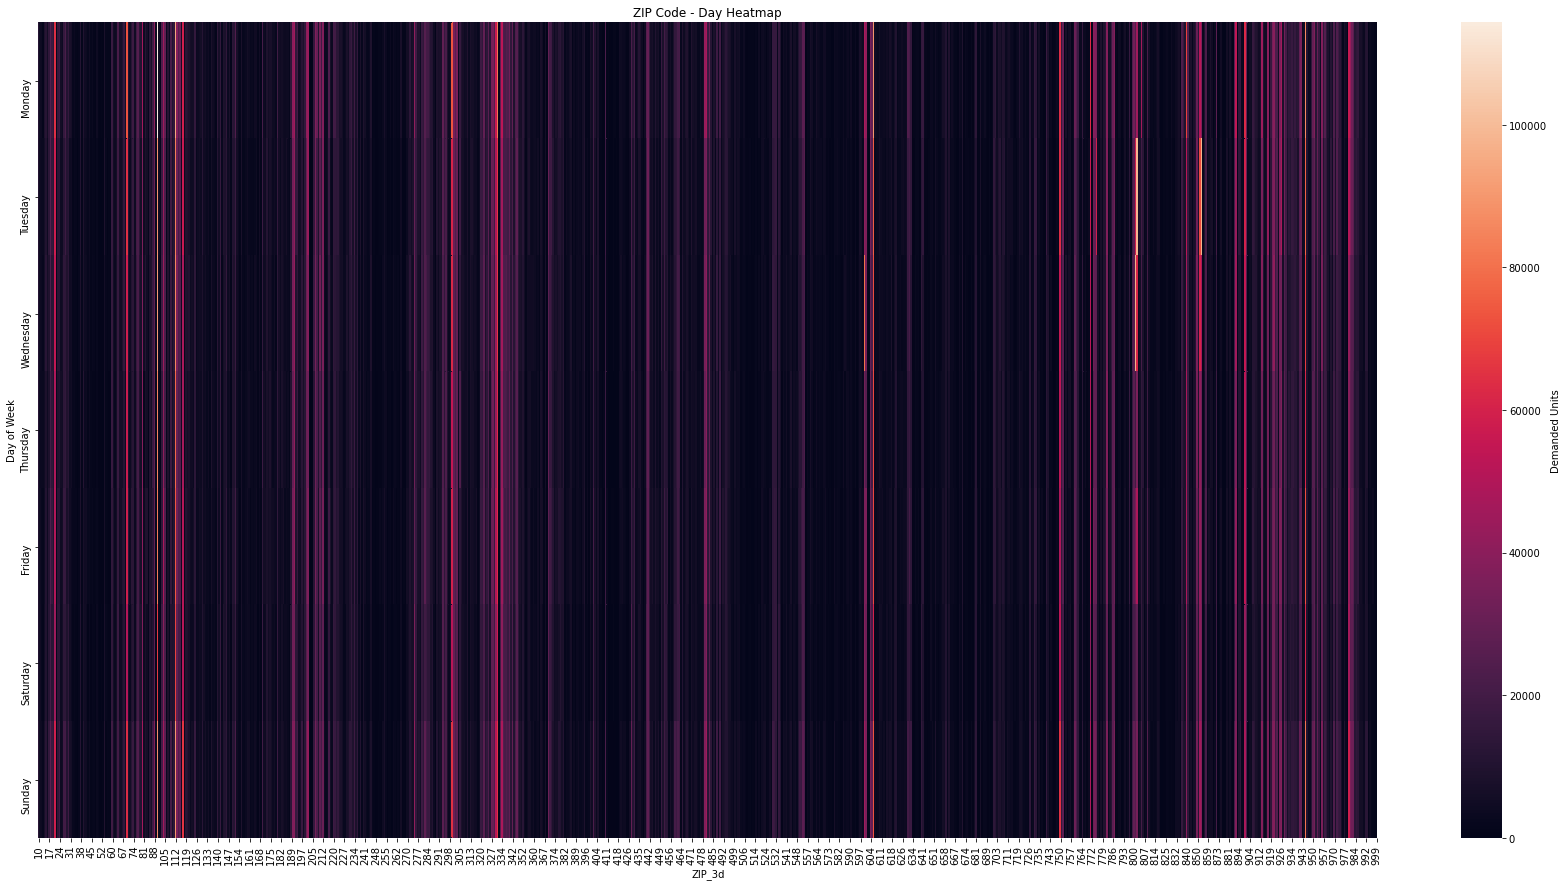

In [441]:
plt.figure(figsize=(30,15))
sns.heatmap(zipcode_day_df,cbar_kws={'label':'Demanded Units'})
plt.title('ZIP Code - Day Heatmap')
plt.show()

In [437]:
day_zp_average_df = pd.DataFrame(np.rint(zipcode_day_df.mean(axis=1))).reset_index()
day_zp_average_df.columns = ['Day of Week','Average']

In [443]:
zipcode_day_df = orders.groupby(['ZIP_3d','Day of Week']).sum()
zipcode_day_df = zipcode_day_df['Quantity']
zipcode_day_df = zipcode_day_df.reindex(dayindex, level=1)
zipcode_day_df = zipcode_day_df.reset_index()

In [884]:
zz_600 = zipcode_day_df[zipcode_day_df['ZIP_3d'].astype('str').str.contains('600')]
zz_210 = zipcode_day_df[zipcode_day_df['ZIP_3d'].astype('str').str.contains('210')]
zz_801 = zipcode_day_df[zipcode_day_df['ZIP_3d'].astype('str').str.contains('801')]
zz_802 = zipcode_day_df[zipcode_day_df['ZIP_3d'].astype('str').str.contains('802')]
zz_852 = zipcode_day_df[zipcode_day_df['ZIP_3d'].astype('str').str.contains('852')]
zz_853 = zipcode_day_df[zipcode_day_df['ZIP_3d'].astype('str').str.contains('853')]

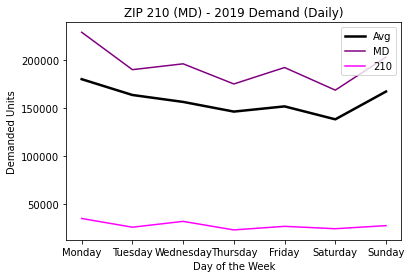

In [888]:
plt.plot(day_st_average_df['Day of Week'],day_st_average_df['Average'],label="Avg",color='black',linewidth=2.5)
plt.plot(Maryland_day['Day of Week'],Maryland_day['Quantity'],label='MD',color="purple")
plt.plot(zz_210['Day of Week'],zz_210['Quantity'],label='210',color='magenta')
plt.legend(loc='upper right')
plt.title('ZIP 210 (MD) - 2019 Demand (Daily)')
plt.xlabel('Day of the Week')
plt.ylabel('Demanded Units')
plt.show()

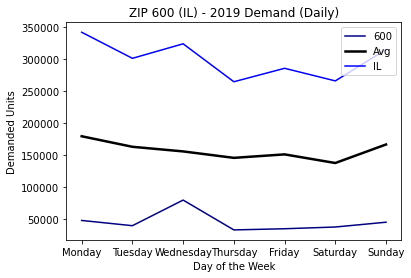

In [812]:
plt.plot(zz_600['Day of Week'],zz_600['Quantity'],label='600',color='navy')
plt.plot(day_st_average_df['Day of Week'],day_st_average_df['Average'],label="Avg",color='black',linewidth=2.5)
plt.plot(Illinois_day['Day of Week'],Illinois_day['Quantity'],label='IL',color="blue")
plt.legend(loc='upper right')
plt.title('ZIP 600 (IL) - 2019 Demand (Daily)')
plt.xlabel('Day of the Week')
plt.ylabel('Demanded Units')
plt.show()

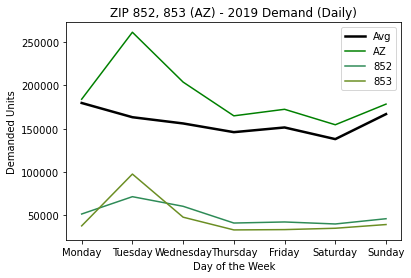

In [817]:
plt.plot(day_st_average_df['Day of Week'],day_st_average_df['Average'],label="Avg",color='black',linewidth=2.5)
plt.plot(Arizona_day['Day of Week'],Arizona_day['Quantity'],label='AZ',color="green")
plt.plot(zz_852['Day of Week'],zz_852['Quantity'],label='852',color='seagreen')
plt.plot(zz_853['Day of Week'],zz_853['Quantity'],label='853',color='olivedrab')
plt.legend(loc='upper right')
plt.title('ZIP 852, 853 (AZ) - 2019 Demand (Daily)')
plt.xlabel('Day of the Week')
plt.ylabel('Demanded Units')
plt.show()

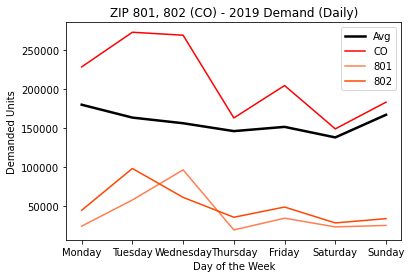

In [889]:
plt.plot(day_st_average_df['Day of Week'],day_st_average_df['Average'],label="Avg",color='black',linewidth=2.5)
plt.plot(Coloado_day['Day of Week'],Coloado_day['Quantity'],label='CO',color="red")
plt.plot(zz_801['Day of Week'],zz_801['Quantity'],label='801',color='coral')
plt.plot(zz_802['Day of Week'],zz_802['Quantity'],label='802',color='orangered')
plt.legend(loc='upper right')
plt.title('ZIP 801, 802 (CO) - 2019 Demand (Daily)')
plt.xlabel('Day of the Week')
plt.ylabel('Demanded Units')
plt.show()

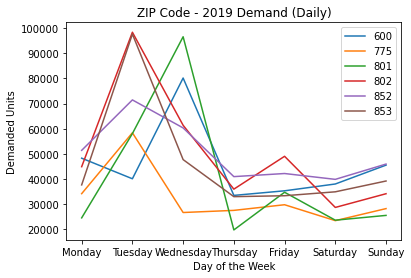

In [452]:
plt.plot(zz_600['Day of Week'],zz_600['Quantity'],label='600 - IL')
plt.plot(zz_775['Day of Week'],zz_775['Quantity'],label='775')
plt.plot(zz_801['Day of Week'],zz_801['Quantity'],label='801')
plt.plot(zz_802['Day of Week'],zz_802['Quantity'],label='802')
plt.plot(zz_852['Day of Week'],zz_852['Quantity'],label='852')
plt.plot(zz_853['Day of Week'],zz_853['Quantity'],label='853')
plt.legend(loc='upper right')
plt.title('ZIP Code - 2019 Demand (Daily)')
plt.xlabel('Day of the Week')
plt.ylabel('Demanded Units')
plt.show()

In [956]:
writer2 = pd.ExcelWriter("1b Demand Analysis.xlsx")

global_week_df.to_excel(writer2, sheet_name = 'Week')
global_day_df.to_excel(writer2, sheet_name = 'Day')
state_week_share_df.to_excel(writer2, sheet_name = 'Week - State')
zipcode_week_share_df.to_excel(writer2, sheet_name = 'Week - ZIP Code')
state_day_share_df.to_excel(writer2, sheet_name = 'Day - State')
zipcode_day_share_df.to_excel(writer2, sheet_name = 'Day - ZIP Code')

writer2.save()

# 1.c Product Demand

Overall Products

In [958]:
product_df = orders.groupby(['Product']).sum()
product_df = product_df['Quantity']
product_df = product_df.reset_index()

In [959]:
top_product_df = product_df.sort_values(by='Quantity',ascending=True)
top_product_df['Percent Share']=top_product_df['Quantity']/top_product_df['Quantity'].sum()*100
print(top_product_df.head(10))

     Product  Quantity  Percent Share
323      450       140       0.000249
555      752       402       0.000716
162      224       528       0.000940
478      648       531       0.000945
559      757       653       0.001162
224      312       940       0.001673
547      726      1205       0.002145
553      744      1450       0.002581
166      239      1511       0.002689
223      311      1870       0.003328


In [962]:
product_share_df = top_product_df[['Product','Percent Share']]

In [916]:
bottom_product_df = product_df.sort_values(by='Quantity',ascending=True).head(10)
print(bottom_product_df)

     Product  Quantity
323      450       140
555      752       402
162      224       528
478      648       531
559      757       653
224      312       940
547      726      1205
553      744      1450
166      239      1511
223      311      1870


In [908]:
product_df = product_df.sort_values(by='Quantity',ascending=False)
product_df['Cumulative'] = product_df['Quantity'].cumsum()/product_df['Quantity'].sum()*100
product_df['Product'] = product_df['Product'].astype(str)
product_df.head(18)

,Product,Quantity,Cumulative
342,474,1785457,3.177992
173,249,1495131,5.839224
174,250,1166422,7.915375
175,251,1038206,9.763311
361,498,969983,11.489815
248,348,926204,13.138395
176,252,881224,14.706914
486,658,680399,15.917978
343,475,675265,17.119904
249,349,636982,18.253688


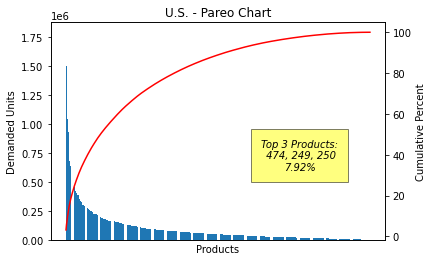

In [894]:
fig,ax = plt.subplots()
ax.set_xlabel('Products')
ax.bar('Product','Quantity',data=product_df)
ax.set_ylabel('Demanded Units')
ax.set_ylim(ymin=0)
ax.tick_params(axis='x',which='both',bottom=False, top=False,labelbottom=False)

ax2 = ax.twinx()
ax2.plot('Product','Cumulative',data=product_df,color='red')
ax2.set_ylabel('Cumulative Percent')
ax.set_ylim(ymin=0)

ax.text(450,600000, 'Top 3 Products:'"\n"' 474, 249, 250'"\n"'7.92%' , style='italic', horizontalalignment='center',
        bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10})

plt.title("U.S. - Pareo Chart")
plt.show()

Product - ZIP Code

In [603]:
top_zipcode_df = zipcode_qty_df.head(10)
top_zipcode_df

,ZIP,Quantity,Latitude,Longitude
79,100,618083.0,40.745256,-73.985202
91,112,575267.0,40.666492,-73.953938
555,606,513014.0,41.881020,-87.664762
842,945,505731.0,37.845875,-122.059678
305,331,464854.0,25.787712,-80.241397
275,300,427521.0,33.878827,-84.247223
59,70,427005.0,40.667400,-74.114600
679,750,402989.0,32.897812,-96.877614
11,21,380758.0,42.351704,-71.077176
96,117,379145.0,40.788074,-73.306259


In [606]:
fig = go.Figure(data=go.Scattergeo(
        lon = top_zipcode_df['Longitude'],
        lat = top_zipcode_df['Latitude'],
        marker ={'color': top_zipcode_df['Quantity'],'colorbar':{'title':'Demanded Units'},'size':top_zipcode_df['Quantity']/20000,}))
fig.update_layout(title = 'Top 10 ZIP Codes',geo_scope='usa',)
fig.show()

In [538]:
product_zipcode_df = orders.groupby(['ZIP_3d','Product']).sum().reset_index()

In [964]:
product_zipcode_share_df = product_zipcode_df/total_qty

In [543]:
z_100_p = product_zipcode_df[product_zipcode_df['ZIP_3d'].astype('str').str.contains('100')][['Product','Quantity']]
z_100_p = z_100_p.sort_values(by='Quantity',ascending=False)
z_100_p['Cumulative'] = z_100_p['Quantity'].cumsum()/z_100_p['Quantity'].sum()*100
z_100_p['Product'] = z_100_p['Product'].astype(str)
print(z_100_p.head(3))

      Product  Quantity  Cumulative
18754     249     28232    4.567671
18756     251     13352    6.727899
18908     474     11117    8.526525


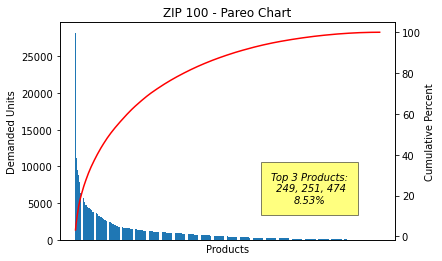

In [558]:
fig,ax = plt.subplots()
ax.set_xlabel('Products')
ax.bar('Product','Quantity',data=z_100_p)
ax.set_ylabel('Demanded Units')
ax.set_ylim(ymin=0)
ax.tick_params(axis='x',which='both',bottom=False, top=False,labelbottom=False)

ax2 = ax.twinx()
ax2.plot('Product','Cumulative',data=product_df,color='red')
ax2.set_ylabel('Cumulative Percent')
ax.set_ylim(ymin=0)

ax.text(450,5000, 'Top 3 Products:'"\n"' 249, 251, 474'"\n"'8.53%' , style='italic', horizontalalignment='center',
        bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10})

plt.title("ZIP 100 - Pareo Chart")
plt.show()

In [552]:
z_112_p = product_zipcode_df[product_zipcode_df['ZIP_3d'].astype('str').str.contains('112')][['Product','Quantity']]
z_112_p = z_112_p.sort_values(by='Quantity',ascending=False)
z_112_p['Cumulative'] = z_112_p['Quantity'].cumsum()/z_112_p['Quantity'].sum()*100
z_112_p['Product'] = z_112_p['Product'].astype(str)
print(z_112_p.head(3))

      Product  Quantity  Cumulative
22522     474     15967    2.775581
22378     249     15500    5.469982
22379     250     12640    7.667222


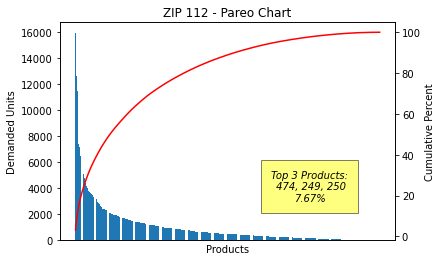

In [562]:
fig,ax = plt.subplots()
ax.set_xlabel('Products')
ax.bar('Product','Quantity',data=z_112_p)
ax.set_ylabel('Demanded Units')
ax.set_ylim(ymin=0)
ax.tick_params(axis='x',which='both',bottom=False, top=False,labelbottom=False)

ax2 = ax.twinx()
ax2.plot('Product','Cumulative',data=product_df,color='red')
ax2.set_ylabel('Cumulative Percent')
ax.set_ylim(ymin=0)

ax.text(450,3000, 'Top 3 Products:'"\n"' 474, 249, 250'"\n"'7.67%' , style='italic', horizontalalignment='center',
        bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10})

plt.title("ZIP 112 - Pareo Chart")
plt.show()

In [556]:
z_606_p = product_zipcode_df[product_zipcode_df['ZIP_3d'].astype('str').str.contains('606')][['Product','Quantity']]
z_606_p = z_606_p.sort_values(by='Quantity',ascending=False)
z_606_p['Cumulative'] = z_606_p['Quantity'].cumsum()/z_606_p['Quantity'].sum()*100
z_606_p['Product'] = z_606_p['Product'].astype(str)
print(z_606_p.head(3))

       Product  Quantity  Cumulative
127248     474     12739    2.483168
127104     249     12620    4.943140
127267     498     10186    6.928661


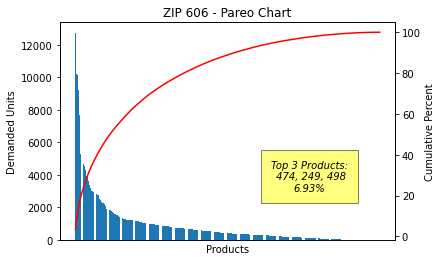

In [563]:
fig,ax = plt.subplots()
ax.set_xlabel('Products')
ax.bar('Product','Quantity',data=z_606_p)
ax.set_ylabel('Demanded Units')
ax.set_ylim(ymin=0)
ax.tick_params(axis='x',which='both',bottom=False, top=False,labelbottom=False)

ax2 = ax.twinx()
ax2.plot('Product','Cumulative',data=product_df,color='red')
ax2.set_ylabel('Cumulative Percent')
ax.set_ylim(ymin=0)

ax.text(450,3000, 'Top 3 Products:'"\n"' 474, 249, 498'"\n"'6.93%' , style='italic', horizontalalignment='center',
        bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10})

plt.title("ZIP 606 - Pareo Chart")
plt.show()

In [564]:
z_945_p = product_zipcode_df[product_zipcode_df['ZIP_3d'].astype('str').str.contains('945')][['Product','Quantity']]
z_945_p = z_945_p.sort_values(by='Quantity',ascending=False)
z_945_p['Cumulative'] = z_945_p['Quantity'].cumsum()/z_945_p['Quantity'].sum()*100
z_945_p['Product'] = z_945_p['Product'].astype(str)
print(z_945_p.head(3))

       Product  Quantity  Cumulative
188424     474     21237    4.199268
188275     249     14168    7.000757
188276     250     10019    8.981850


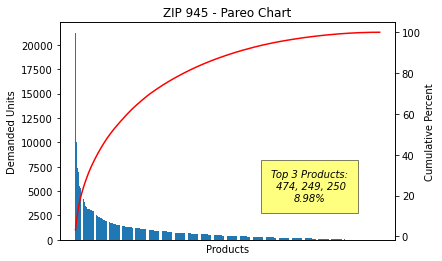

In [566]:
fig,ax = plt.subplots()
ax.set_xlabel('Products')
ax.bar('Product','Quantity',data=z_945_p)
ax.set_ylabel('Demanded Units')
ax.set_ylim(ymin=0)
ax.tick_params(axis='x',which='both',bottom=False, top=False,labelbottom=False)

ax2 = ax.twinx()
ax2.plot('Product','Cumulative',data=product_df,color='red')
ax2.set_ylabel('Cumulative Percent')
ax.set_ylim(ymin=0)

ax.text(450,4000, 'Top 3 Products:'"\n"' 474, 249, 250'"\n"'8.98%' , style='italic', horizontalalignment='center',
        bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10})

plt.title("ZIP 945 - Pareo Chart")
plt.show()

In [567]:
z_331_p = product_zipcode_df[product_zipcode_df['ZIP_3d'].astype('str').str.contains('331')][['Product','Quantity']]
z_331_p = z_331_p.sort_values(by='Quantity',ascending=False)
z_331_p['Cumulative'] = z_331_p['Quantity'].cumsum()/z_331_p['Quantity'].sum()*100
z_331_p['Product'] = z_331_p['Product'].astype(str)
print(z_331_p.head(3))

      Product  Quantity  Cumulative
74873     474     13264    2.853369
74734     249     12230    5.484303
74735     250      8048    7.215599


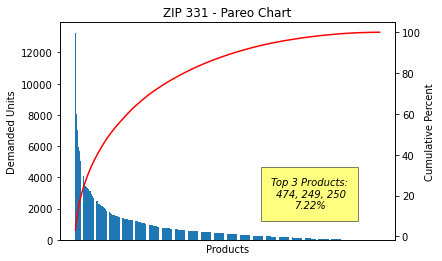

In [570]:
fig,ax = plt.subplots()
ax.set_xlabel('Products')
ax.bar('Product','Quantity',data=z_331_p)
ax.set_ylabel('Demanded Units')
ax.set_ylim(ymin=0)
ax.tick_params(axis='x',which='both',bottom=False, top=False,labelbottom=False)

ax2 = ax.twinx()
ax2.plot('Product','Cumulative',data=product_df,color='red')
ax2.set_ylabel('Cumulative Percent')
ax.set_ylim(ymin=0)

ax.text(450,2000, 'Top 3 Products:'"\n"' 474, 249, 250'"\n"'7.22%' , style='italic', horizontalalignment='center',
        bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10})

plt.title("ZIP 331 - Pareo Chart")
plt.show()

In [571]:
z_300_p = product_zipcode_df[product_zipcode_df['ZIP_3d'].astype('str').str.contains('300')][['Product','Quantity']]
z_300_p = z_300_p.sort_values(by='Quantity',ascending=False)
z_300_p['Cumulative'] = z_300_p['Quantity'].cumsum()/z_300_p['Quantity'].sum()*100
z_300_p['Product'] = z_300_p['Product'].astype(str)
print(z_300_p.head(3))

      Product  Quantity  Cumulative
65633     474     16329    3.819462
65490     250     11257    6.452549
65489     249      9813    8.747874


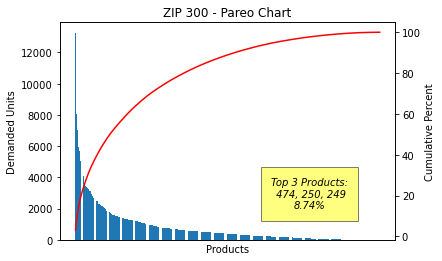

In [573]:
fig,ax = plt.subplots()
ax.set_xlabel('Products')
ax.bar('Product','Quantity',data=z_331_p)
ax.set_ylabel('Demanded Units')
ax.set_ylim(ymin=0)
ax.tick_params(axis='x',which='both',bottom=False, top=False,labelbottom=False)

ax2 = ax.twinx()
ax2.plot('Product','Cumulative',data=product_df,color='red')
ax2.set_ylabel('Cumulative Percent')
ax.set_ylim(ymin=0)

ax.text(450,2000, 'Top 3 Products:'"\n"' 474, 250, 249'"\n"'8.74%' , style='italic', horizontalalignment='center',
        bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10})

plt.title("ZIP 300 - Pareo Chart")
plt.show()

In [575]:
z_70_p = product_zipcode_df[product_zipcode_df['ZIP_3d'].astype('str').str.fullmatch('70')][['Product','Quantity']]
z_70_p = z_70_p.sort_values(by='Quantity',ascending=False)
z_70_p['Cumulative'] = z_70_p['Quantity'].cumsum()/z_70_p['Quantity'].sum()*100
z_70_p['Product'] = z_70_p['Product'].astype(str)
print(z_70_p.head(3))

      Product  Quantity  Cumulative
12758     474     15582    3.649138
12611     249      9372    5.843960
12775     498      7075    7.500849


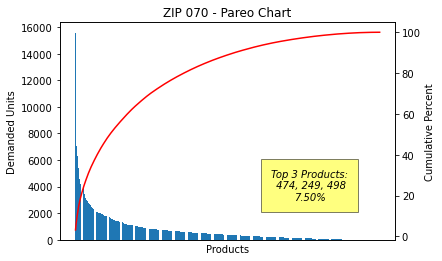

In [577]:
fig,ax = plt.subplots()
ax.set_xlabel('Products')
ax.bar('Product','Quantity',data=z_70_p)
ax.set_ylabel('Demanded Units')
ax.set_ylim(ymin=0)
ax.tick_params(axis='x',which='both',bottom=False, top=False,labelbottom=False)

ax2 = ax.twinx()
ax2.plot('Product','Cumulative',data=product_df,color='red')
ax2.set_ylabel('Cumulative Percent')
ax.set_ylim(ymin=0)

ax.text(450,3000, 'Top 3 Products:'"\n"' 474, 249, 498'"\n"'7.50%' , style='italic', horizontalalignment='center',
        bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10})

plt.title("ZIP 070 - Pareo Chart")
plt.show()

In [578]:
z_750_p = product_zipcode_df[product_zipcode_df['ZIP_3d'].astype('str').str.fullmatch('750')][['Product','Quantity']]
z_750_p = z_750_p.sort_values(by='Quantity',ascending=False)
z_750_p['Cumulative'] = z_750_p['Quantity'].cumsum()/z_750_p['Quantity'].sum()*100
z_750_p['Product'] = z_750_p['Product'].astype(str)
print(z_750_p.head(3))

       Product  Quantity  Cumulative
147994     474     13438    3.334582
147846     249     11113    6.092226
147847     250      9582    8.469958


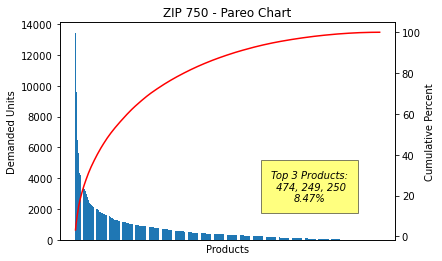

In [580]:
fig,ax = plt.subplots()
ax.set_xlabel('Products')
ax.bar('Product','Quantity',data=z_750_p)
ax.set_ylabel('Demanded Units')
ax.set_ylim(ymin=0)
ax.tick_params(axis='x',which='both',bottom=False, top=False,labelbottom=False)

ax2 = ax.twinx()
ax2.plot('Product','Cumulative',data=product_df,color='red')
ax2.set_ylabel('Cumulative Percent')
ax.set_ylim(ymin=0)

ax.text(450,2500, 'Top 3 Products:'"\n"' 474, 249, 250'"\n"'8.47%' , style='italic', horizontalalignment='center',
        bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10})

plt.title("ZIP 750 - Pareo Chart")
plt.show()

In [581]:
z_21_p = product_zipcode_df[product_zipcode_df['ZIP_3d'].astype('str').str.fullmatch('21')][['Product','Quantity']]
z_21_p = z_21_p.sort_values(by='Quantity',ascending=False)
z_21_p['Cumulative'] = z_21_p['Quantity'].cumsum()/z_21_p['Quantity'].sum()*100
z_21_p['Product'] = z_21_p['Product'].astype(str)
print(z_21_p.head(3))

     Product  Quantity  Cumulative
3291     474     13612    3.574974
3155     249     10819    6.416411
3156     250      7503    8.386954


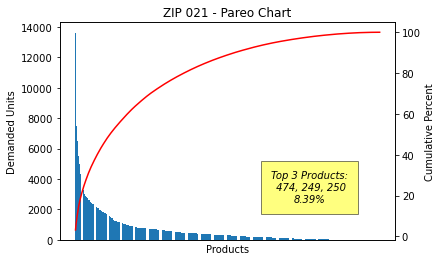

In [582]:
fig,ax = plt.subplots()
ax.set_xlabel('Products')
ax.bar('Product','Quantity',data=z_21_p)
ax.set_ylabel('Demanded Units')
ax.set_ylim(ymin=0)
ax.tick_params(axis='x',which='both',bottom=False, top=False,labelbottom=False)

ax2 = ax.twinx()
ax2.plot('Product','Cumulative',data=product_df,color='red')
ax2.set_ylabel('Cumulative Percent')
ax.set_ylim(ymin=0)

ax.text(450,2500, 'Top 3 Products:'"\n"' 474, 249, 250'"\n"'8.39%' , style='italic', horizontalalignment='center',
        bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10})

plt.title("ZIP 021 - Pareo Chart")
plt.show()

In [583]:
z_117_p = product_zipcode_df[product_zipcode_df['ZIP_3d'].astype('str').str.fullmatch('117')][['Product','Quantity']]
z_117_p = z_117_p.sort_values(by='Quantity',ascending=False)
z_117_p['Cumulative'] = z_117_p['Quantity'].cumsum()/z_117_p['Quantity'].sum()*100
z_117_p['Product'] = z_117_p['Product'].astype(str)
print(z_117_p.head(3))

      Product  Quantity  Cumulative
24464     474     17143    4.521489
24324     249      7898    6.604597
24465     475      7463    8.572973


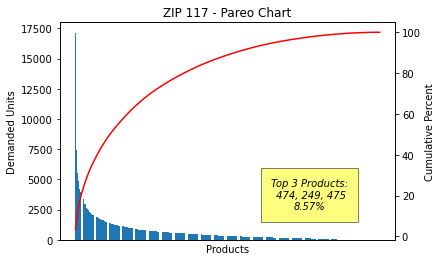

In [584]:
fig,ax = plt.subplots()
ax.set_xlabel('Products')
ax.bar('Product','Quantity',data=z_117_p)
ax.set_ylabel('Demanded Units')
ax.set_ylim(ymin=0)
ax.tick_params(axis='x',which='both',bottom=False, top=False,labelbottom=False)

ax2 = ax.twinx()
ax2.plot('Product','Cumulative',data=product_df,color='red')
ax2.set_ylabel('Cumulative Percent')
ax.set_ylim(ymin=0)

ax.text(450,2500, 'Top 3 Products:'"\n"' 474, 249, 475'"\n"'8.57%' , style='italic', horizontalalignment='center',
        bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10})

plt.title("ZIP 117 - Pareo Chart")
plt.show()

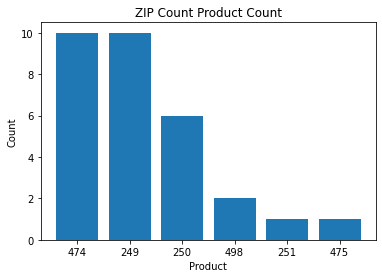

In [922]:
plt.bar(['474','249','250','498','251','475'],[10,10,6,2,1,1])
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('ZIP Count Product Count')
plt.show()

In [965]:
writer3 = pd.ExcelWriter("1c Demand Share.xlsx") 
product_share_df.to_excel(writer3, sheet_name = 'Product')
product_zipcode_share_df.to_excel(writer3, sheet_name = 'Product - ZIP Code')
writer3.save()